# Tankmodell - To tanker
__Creative Commons BY-SA : bitjungle (Rune Mathisen) og fuzzbin (Tom Jarle Christiansen)__

<hr/>

<img alt="Opphavsmann: Life-Of-Pix Lisens: Creative Commons CC0" title="Opphavsmann: Life-Of-Pix Lisens: Creative Commons CC0" style="width: 200px; float: right; margin-left: 30px;" src="img/tanks-406908_640.jpg">

__Tidligere har vi laget [en modell for en tank hvor det strømmer væske ut av et hull i bunnen av tanken](https://github.com/fagstoff/ProgMod/blob/master/Fagstoff/tankmodell_3.ipynb), og [en modell hvor det strømmer væske inn i og ut av tanken samtidig](https://github.com/fagstoff/ProgMod/blob/master/Fagstoff/tankmodell_4.ipynb). Nå skal vi lage en modell med to tanker, hvor utløpet i den første tanken er innløpet til den andre tanken. __ 

> Denne siden dekker helt eller delvis kompetansemålene: <br>
> [Grunnleggende programmering 2, 3 og 4](https://github.com/fagstoff/ProgMod/blob/master/L%C3%A6replan/kompetansem%C3%A5l.md#grunnleggende-programmering) <br>
> [Matematiske metoder 1, 2, 4 og 5](https://github.com/fagstoff/ProgMod/blob/master/L%C3%A6replan/kompetansem%C3%A5l.md#matematiske-metoder) <br>
> [Modellering 1](https://github.com/fagstoff/ProgMod/blob/master/L%C3%A6replan/kompetansem%C3%A5l.md#modellering)


Vi har nå problemstillingen som er vist i figuren nedenfor:

![Skisse av tanken](img/tank03.png)

Tanken har tverrsnitt $A_t=2 \ \mathrm{m}^2$ over hele høyden til tanken. I toppen av tanken kommer det inn væske $q_{inn} = 0.05 \ m^3/s$ (50 liter i sekundet). I bunnen av tanken er det et hull hvor innholdet i tanken renner ut. Arealet til dette hullet er $A_h=0,01 \ \mathrm{m}^2$. Ved tiden $t=0 \ \mathrm{s}$ er tanken fylt opp til høyden $h=4 \ \mathrm{m}$. Hvordan vil høyden $h$ endres over tid? Vil tanken tømmes helt? Vi antar at væsken er inkompresibel og at den strømmer friksjonsfritt ut av hullet i bunnen. Vi kan også sette $g=9.81 \ \mathrm{m/s}^2$.

La oss først definere de parametrene vi har fått oppgitt:

In [32]:
import math # vi trenger dette biblioteket senere

A_t1 = 2.00  # Tank 1 tverrsnittareal (m^2)
A_t2 = 2.00  # Tank 2 tverrsnittareal (m^2)
A_h1 = 0.002 # Hull 1 tverrsnittareal (m^2)
A_h2 = 0.002 # Hull 2 tverrsnittareal (m^2)
h_1 = 4.00 # Vannivået i tank 1 når forsøket starter (m)
h_2 = 4.00 # Vannivået i tank 2 når forsøket starter (m)
g = 9.81 # Gravitasjonskonstanten (m/s^2)
q_inn1 = 0.005 # Mengde vann inn i toppen av tanken (m^3/s)
q_inn2 = 0 # initialverdi for innstrømming i tank 2

Nå setter vi opp et uttrykk for hvordan volumet endrer seg over tid, når det kommer væske inn i toppen av tanken samtidig som det strømmer væske ut i bunnen av tanken. Da har vi at:

$$ \frac{dV}{dt} = q_{inn} - q_{ut}$$

Eller for å si det med ord: 
> Endringen til volumet av væsken i tanken er lik mengden væske som strømmer inn i tanken minus det som strømmer ut av tanken.

Dette betyr at dersom det strømmer 100 liter væske inn i tanken og 300 liter ut av tanken i løpet av et sekund, så har volumet av væsken i tanken minket med 200 liter i løpet av det samme sekundet.

Vi tar først for oss tank 1. I [tankmodell 2](https://github.com/fagstoff/ProgMod/blob/master/Fagtekster/Notebooks/tankmodell2.ipynb) fant vi at vi kunne uttrykke endring i væskehøyde over tid slik:

$$ \frac{dh_1}{dt} = \frac{1}{A_{t1}} \left( q_{inn1} - A_{h1} k \sqrt{h_1} \right) $$


hvor $k = C \cdot \sqrt{2g}$. Dersom det er vann i tanken, kan vi anta at $C = 0,61$. Vi kan regne ut konstanten $k$:


In [33]:
C = 0.61
k = C * math.sqrt(2*g)
print("Konstanten k er {}".format(k))

Konstanten k er 2.7019626200227123


Vi kan lage et tilsvarene uttrykk for endring av væskehøyden i tank 2, men her er ikke innstrømmingen i tanken en konstant. Mengden inn i tank 2 er det samme som mengden ut av tank 1:

$$ q_{inn2} = q_{ut1} $$

Vi kan regne ut $q_{ut1}$ slik:

$$ q_{ut1} = A_{h1} \cdot v_1$$

Da kan vi sette opp et uttrykk for endring av væskehøyde i tank 2:

$$ \frac{dh_2}{dt} = \frac{1}{A_{t2}} \left( q_{inn2} - A_{h2} k \sqrt{h_2} \right) $$

Nå må vi implementere Eulers metode i Python slik at funksjonen kan brukes på begge tankene:

In [34]:
def euler(h, dh, dt):
    '''Regner ut ny høyde i tanken vet tiden t+dt, 
    gitt høyden og stigningstallet dh ved tiden t.'''
    return h + dh * dt

def stigning(A_h, A_t, h, q_inn):
    '''Regner ut stigningen i punktet h.
    Parameteren k er en global konstant.'''
    return 1/A_t * ((q_inn) - A_h * k * math.sqrt(h))

def hastighet(h):
    '''Regner ut hastigheten til væskestrømmen ut av tanken 
    når væskehøyden er h. Parameteren k er en global konstant.'''
    if h > 0.0:
        return k * math.sqrt(h)
    else:
        return 0.0

Vi starter ved tiden $t=0$ og endrer tiden med 5 sekunder for hver nye beregning ($\Delta t=60$).

t = 0 => h_1 = 4.0 	 q_inn1 = 0.005 	 h_2 = 4.0 	 q_inn2 = 0
t = 60 => h_1 = 3.83 	 q_inn1 = 0.005 	 h_2 = 3.99 	 q_inn2 = 0.0106
t = 120 => h_1 = 3.66 	 q_inn1 = 0.005 	 h_2 = 3.98 	 q_inn2 = 0.0103
t = 180 => h_1 = 3.5 	 q_inn1 = 0.005 	 h_2 = 3.96 	 q_inn2 = 0.0101
t = 240 => h_1 = 3.35 	 q_inn1 = 0.005 	 h_2 = 3.93 	 q_inn2 = 0.0099
t = 300 => h_1 = 3.2 	 q_inn1 = 0.005 	 h_2 = 3.9 	 q_inn2 = 0.0097
t = 360 => h_1 = 3.06 	 q_inn1 = 0.005 	 h_2 = 3.86 	 q_inn2 = 0.0095
t = 420 => h_1 = 2.93 	 q_inn1 = 0.005 	 h_2 = 3.82 	 q_inn2 = 0.0092
t = 480 => h_1 = 2.8 	 q_inn1 = 0.005 	 h_2 = 3.78 	 q_inn2 = 0.009
t = 540 => h_1 = 2.68 	 q_inn1 = 0.005 	 h_2 = 3.73 	 q_inn2 = 0.0088
t = 600 => h_1 = 2.56 	 q_inn1 = 0.005 	 h_2 = 3.67 	 q_inn2 = 0.0086
t = 660 => h_1 = 2.45 	 q_inn1 = 0.005 	 h_2 = 3.62 	 q_inn2 = 0.0085
t = 720 => h_1 = 2.35 	 q_inn1 = 0.005 	 h_2 = 3.56 	 q_inn2 = 0.0083
t = 780 => h_1 = 2.25 	 q_inn1 = 0.005 	 h_2 = 3.49 	 q_inn2 = 0.0081
t = 840 => h_1 = 2.16 	 q_inn1 = 0.

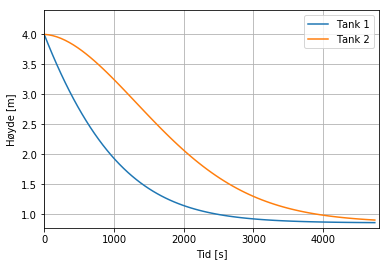

In [35]:
t = 0  # starttiden
dt = 60 # tidssteg i sekunder
h_lim = 0.01 # vi stopper beregningen når høyden er mindre enn denne
t_lim = 4800 # vi stopper beregningen etter 4800 sekunder
t_hist = [] # Lagerplass for historiske tidspunkter
h1_hist = [] # Lagerplass for historiske h-verdier
h2_hist = [] # Lagerplass for historiske h-verdier
while h_1 > h_lim and t < t_lim:
    if t > 0: # ingen beregning ved t = 0, der bruker vi initialverdier
        h_1 = euler(h_1, stigning(A_h1, A_t1, h_1, q_inn1), dt)
        v_1 = hastighet(h_1) # Hastigheten til væsken som strømmer ut av hullet
        q_inn2 = A_h1 * v_1 # Mengden væske som strømmer ut av hullet i tank 1
        h_2 = euler(h_2, stigning(A_h2, A_t2, h_2, q_inn2), dt)
    print("t = {} => h_1 = {} \t q_inn1 = {} \t h_2 = {} \t q_inn2 = {}".format(t, round(h_1,2), q_inn1, round(h_2,2), round(q_inn2,4)))
    t_hist.append(t)
    h1_hist.append(h_1)
    h2_hist.append(h_2)
    t += dt

import matplotlib.pyplot as plt
plt.plot(t_hist, h1_hist, label="Tank 1")
plt.plot(t_hist, h2_hist, label="Tank 2")
plt.ylabel('Høyde [m]')
plt.xlabel('Tid [s]')
plt.axis([0, t_lim, min(h1_hist + h2_hist)*0.9, max(h1_hist + h2_hist)*1.1])
plt.legend()
plt.grid()
plt.show()

# Oppgaver
1. I koden ovenfor er det to identiske tanker som er koblet sammen. Forsøk å endre parametere på de to tankene ($A_{t1}, A_{t2}, A_{h1}, A_{h2}$), og se hva som skjer.
2. Kan du lage en modell som har tre sammenkoblede tanker?